# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [40]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib
plt = matplotlib.pyplot
%matplotlib inline

# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [2]:
# Part 1: Spectral Clustering

def spectral_clustering(X):
  """Args:
    X: numpy.array [num_samples, input_dim]
    
    Returns:
    Y_pred: numpy.array [num_samples]
      array of cluster labels
  """
  # Your code here
  return Y_pred


## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [3]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

In [4]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)


## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [5]:
# Part 3: Report the accuracy of clustering




---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [199]:
# Part 1: MDS

def MDS(X, k, output_dim=2):
    """Args:
        X: numpy.array [n_samples, input_dim]
        k: number of nearest neighbours to construct the knn graph
        output_dim: dimension of output data

        Returns:
        Y: numpy.array [n_samples, output_dim]
    """
    # Your code here
    from sklearn.metrics.pairwise import euclidean_distances
    D = euclidean_distances(X, X)
    
    n = X.shape[0]
    I = np.identity(n, dtype='float')
    e = np.ones(n, dtype='float')
    J = I - (1/n) * np.dot(e, e.T)
    B = (-1/2) * J * D * J
    
    eigen_values, eigen_vectors = np.linalg.eig(B)
    largest_indices = (-eigen_values).argsort()[:output_dim]
    eig_vals = np.empty(output_dim)
    eig_vecs = np.empty((output_dim, n))
    for i in range(output_dim):
        eig_vals[i] = eigen_values[largest_indices[i]]
        eig_vecs[i] = eigen_vectors[largest_indices[i]]    
        
    E = eig_vecs.T
    V = np.diag(np.sqrt(eig_vals))
    
    Y = np.dot(E, V)
    
    return Y

## Part 2: LLE
Implement Locally Linear Embedding function

In [102]:
# Part 2: LLE

def LLE(X, k, output_dim=2):
  """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
  """
  # Your code here
#   return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [103]:
# Part 3: Isomap

def ISOMAP(X, k, output_dim=2):
  """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
  """
  # Your code here
#   return Y

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [104]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

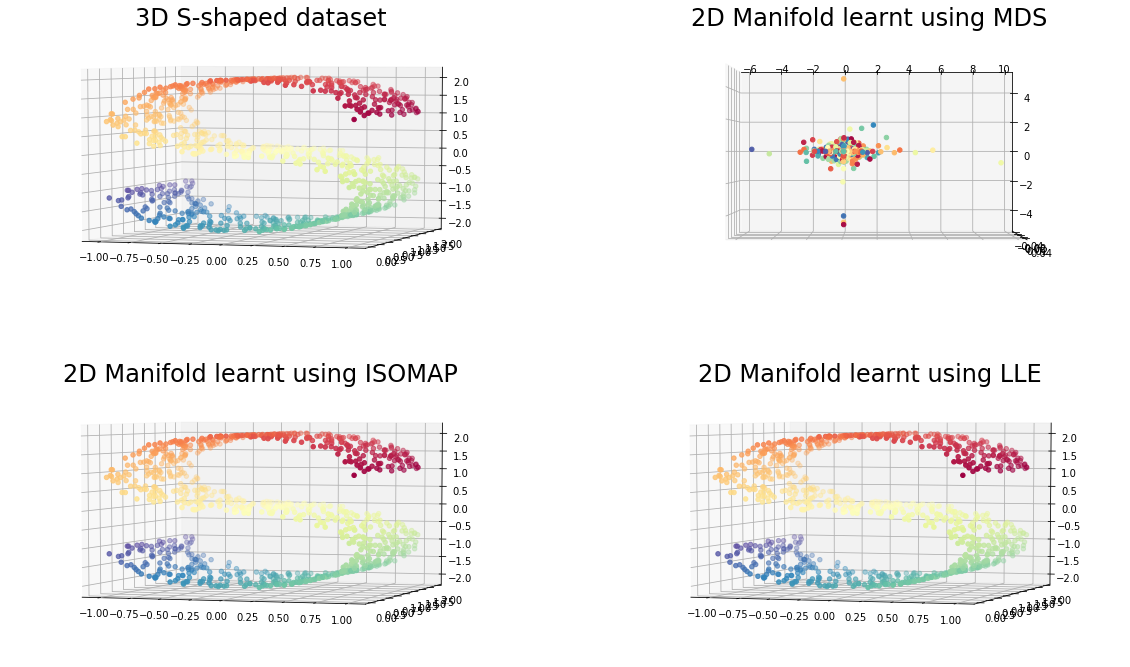

In [211]:
#  Visualization code here
from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure(figsize=(20, 12))
n_neighbors = 10

ax = fig.add_subplot(221, projection='3d')
ax.scatter(SX[:, 0], SX[:, 1], SX[:, 2], c=St, cmap=plt.cm.Spectral)
ax.set_title("3D S-shaped dataset", fontsize=24)
ax.view_init(4, -72)

Y = MDS(SX, n_neighbors, 2)
ax = fig.add_subplot(222, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], c=St, cmap=plt.cm.Spectral)
ax.set_title("2D Manifold learnt using MDS", fontsize=24)
ax.view_init(90, -90)

ISOMAP(SX, n_neighbors, 2)
ax = fig.add_subplot(223, projection='3d')
ax.scatter(SX[:, 0], SX[:, 1], SX[:, 2], c=St, cmap=plt.cm.Spectral)
ax.set_title("2D Manifold learnt using ISOMAP", fontsize=24)
ax.view_init(4, -72)

LLE(SX, n_neighbors, 2)
ax = fig.add_subplot(224, projection='3d')
ax.scatter(SX[:, 0], SX[:, 1], SX[:, 2], c=St, cmap=plt.cm.Spectral)
ax.set_title("2D Manifold learnt using LLE", fontsize=24)
ax.view_init(4, -72)


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [11]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

In [12]:
# CODE HERE



---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [13]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

Using TensorFlow backend.
/home/debo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/debo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/debo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/debo/.local/lib/python3.6/site-packages/tensorflow/python/framewo

EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
def reductionUsingPCA(X, k, output_dim):
  """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    pca_X: numpy.array [n_samples, output_dim]
  """
  # Enter your code here
  return pca_X

In [ ]:
def reductionUsingISOMAP(X, k, output_dim):
  """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    isomap_X: numpy.array [n_samples, output_dim]
  """
  # Enter your code here
  return isomap_X

In [ ]:
# Classification Algorithm 
# Extra functions here

def classification(X, n_classes):
  """Args:
    X: numpy.array [n_samples, input_dim]
    n_classes: number of classes

    Returns:
    labels: numpy_array [n_samples]
  """
  # Your code here
  return labels


In [ ]:
def F1_score(y_true, y_pred):
  """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier
    
    Returns:
    score: float, f1-score
  """
  # Enter your code here
  return score